In [1]:
#pakages import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [2]:
#read data
dataloan=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
dataloan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
pd.set_option('display.max_rows',dataloan.shape[0]+1)

In [4]:
dataloan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [5]:
#see missing-values
dataloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataloan.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
dataloan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#Categorics features
dataloan.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
#we have some many missing features and we have to make decision to deal with thm

In [10]:
#Complete missing values 
data_types=[]
data_numerical=[]
for num,typ in enumerate(dataloan.dtypes):
    if typ==object:
        data_types.append(dataloan.iloc[:,num])
    else:
        data_numerical.append(dataloan.iloc[:,num])
        
data_types=pd.DataFrame(data_types).transpose()
data_numerical=pd.DataFrame(data_numerical).transpose()

In [11]:
data_types

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,Semiurban,N


In [12]:
#Complete missing values for numericals values
data_types=data_types.apply(lambda y:y.fillna(y.value_counts().index[0]))
data_types.isnull().sum().any()

False

In [13]:
#Complete missing values for types 
data_numreical=data_numerical.fillna(method='bfill',inplace=True)
data_numerical.isnull().sum().any()

False

In [14]:
#we have complete missing types_features

In [15]:
# transforme target values
target_values={'Y':1,'N':0}
target=data_types['Loan_Status']
data_types.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_values)
target

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

In [16]:
#replace types features by numerical features
label=LabelEncoder()
for typ in data_types:
    data_types[typ]=label.fit_transform(data_types[typ])
data_types

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
5,5,1,1,2,0,1,2
6,6,1,1,0,1,0,2
7,7,1,1,3,0,0,1
8,8,1,1,2,0,0,2
9,9,1,1,1,0,0,1


In [17]:
#delete some none import features
#data_types.drop('Loan_ID',axis=1,inplace=True)

In [18]:
X=pd.concat([data_types,data_numerical],axis=1)
Y=target

In [19]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,5849.0,0.000000,128.0,360.0,1.0
1,1,1,1,1,0,0,0,4583.0,1508.000000,128.0,360.0,1.0
2,2,1,1,0,0,1,2,3000.0,0.000000,66.0,360.0,1.0
3,3,1,1,0,1,0,2,2583.0,2358.000000,120.0,360.0,1.0
4,4,1,0,0,0,0,2,6000.0,0.000000,141.0,360.0,1.0
5,5,1,1,2,0,1,2,5417.0,4196.000000,267.0,360.0,1.0
6,6,1,1,0,1,0,2,2333.0,1516.000000,95.0,360.0,1.0
7,7,1,1,3,0,0,1,3036.0,2504.000000,158.0,360.0,0.0
8,8,1,1,2,0,0,2,4006.0,1526.000000,168.0,360.0,1.0
9,9,1,1,1,0,0,1,12841.0,10968.000000,349.0,360.0,1.0


In [20]:
Y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

In [21]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

C:\Users\Davi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


the percentage of according loan is:0.3127035830618892
the percentage of unaccording loan is:0.6872964169381107


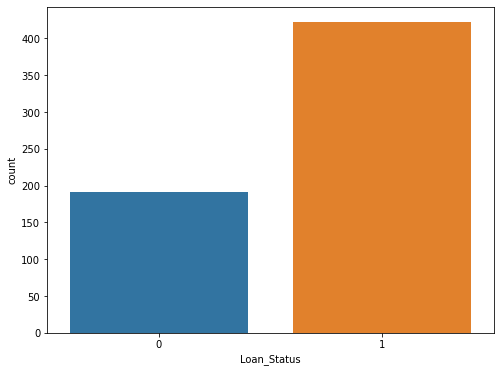

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(Y)
Yes=Y.value_counts()[0]/len(Y)
No=Y.value_counts()[1]/len(Y)
print(f'the percentage of according loan is:{Yes}')
print(f'the percentage of unaccording loan is:{No}')

In [23]:
#data completed
X1=pd.concat([data_types,data_numerical,Y],axis=1)

In [24]:
X1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,0,0,0,2,5849.0,0.000000,128.0,360.0,1.0,1
1,1,1,1,1,0,0,0,4583.0,1508.000000,128.0,360.0,1.0,0
2,2,1,1,0,0,1,2,3000.0,0.000000,66.0,360.0,1.0,1
3,3,1,1,0,1,0,2,2583.0,2358.000000,120.0,360.0,1.0,1
4,4,1,0,0,0,0,2,6000.0,0.000000,141.0,360.0,1.0,1
5,5,1,1,2,0,1,2,5417.0,4196.000000,267.0,360.0,1.0,1
6,6,1,1,0,1,0,2,2333.0,1516.000000,95.0,360.0,1.0,1
7,7,1,1,3,0,0,1,3036.0,2504.000000,158.0,360.0,0.0,0
8,8,1,1,2,0,0,2,4006.0,1526.000000,168.0,360.0,1.0,1
9,9,1,1,1,0,0,1,12841.0,10968.000000,349.0,360.0,1.0,0


C:\Users\Davi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davi\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


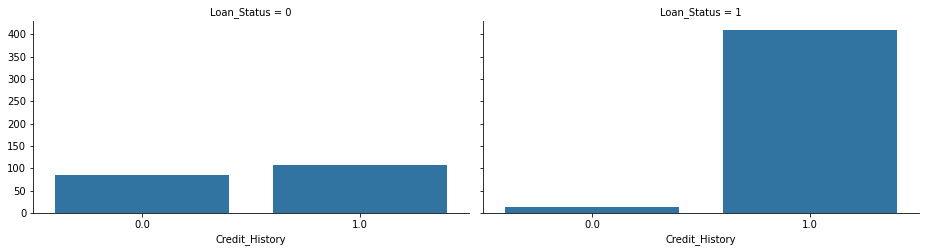

In [25]:
#loan story
Gridloan=sns.FacetGrid(X1,col='Loan_Status',size=3.6,aspect=1.8)
Gridloan.map(sns.countplot,'Credit_History')

C:\Users\Davi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davi\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


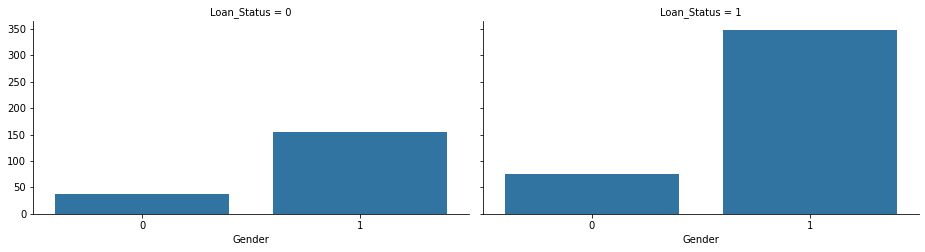

In [26]:
#Gender
Gridloan=sns.FacetGrid(X1,col='Loan_Status',size=3.6,aspect=1.8)
Gridloan.map(sns.countplot,'Gender')

C:\Users\Davi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davi\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


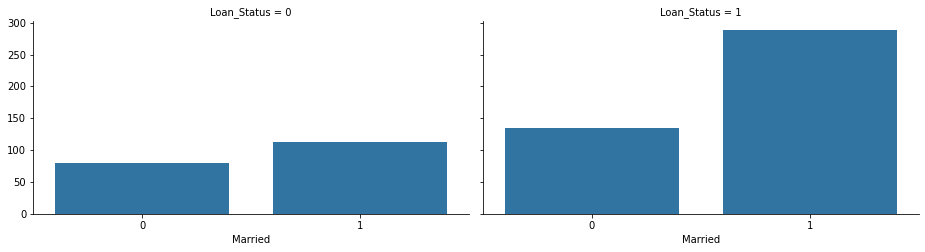

In [27]:
#Married
Gridloan=sns.FacetGrid(X1,col='Loan_Status',size=3.6,aspect=1.8)
Gridloan.map(sns.countplot,'Married')

C:\Users\Davi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davi\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


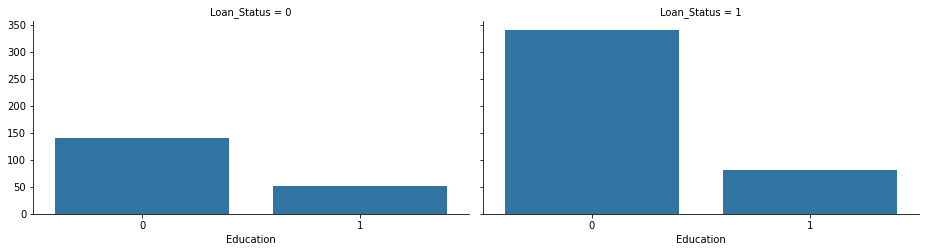

In [28]:
#Educated
Gridloan=sns.FacetGrid(X1,col='Loan_Status',size=3.6,aspect=1.8)
Gridloan.map(sns.countplot,'Education')

In [29]:
X1.groupby('Loan_Status').median()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,,
0,302.5,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,309.5,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


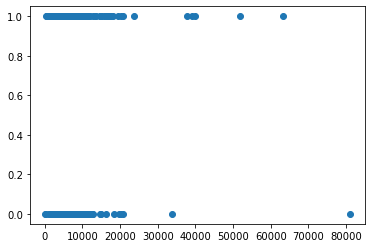

In [30]:
#Income
plt.scatter(X1['ApplicantIncome'],X1['Loan_Status'])

In [31]:
#Create train data and test data
Sloan=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=40)
for train_data,test_data in Sloan.split(X1,Y):
    X_train_data,X_test_data=X1.iloc[train_data],X1.iloc[test_data]
    Y_train_data,Y_test_data=Y.iloc[train_data],Y.iloc[test_data]
X_train_data.shape,X_test_data.shape

((491, 13), (123, 13))

In [32]:
# Inplimentation of some classification models
loanmodels={
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=40),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(random_state=40),
}

In [33]:
def accuracyscore(y_true,y_pred,return1=False):
    score=accuracy_score(y_true,y_pred)
    if return1:
        return score
    else:
        print(f'model_precision is :{score}')
    

In [34]:
def train_test_eval_data(loanmodel,X_data_train1,Y_data_train1,X_data_test1,Y_data_test1):
    for data_name,data_model in loanmodel.items():
        print(data_name,':')
        data_model.fit(X_data_train1,Y_data_train1)
        accuracyscore(Y_data_test1,data_model.predict(X_data_test1))
        print('-'*30)
train_test_eval_data(loanmodels,X_train_data,Y_train_data,X_test_data,Y_test_data)
        

DecisionTreeClassifier :
model_precision is :1.0
------------------------------
KNeighborsClassifier :
model_precision is :0.6422764227642277
------------------------------
LogisticRegression :
model_precision is :0.975609756097561
------------------------------


C:\Users\Davi\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
Data_deploy=X1[['Credit_History','Married','CoapplicantIncome']]

In [36]:
Sloan=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=50)
for train_data,test_data in Sloan.split(Data_deploy,Y):
    X_train_data,X_test_data=Data_deploy.iloc[train_data],Data_deploy.iloc[test_data]
    Y_train_data,Y_test_data=Y.iloc[train_data],Y.iloc[test_data]
X_train_data.shape,X_test_data.shape

((491, 3), (123, 3))

In [37]:
train_test_eval_data(loanmodels,X_train_data,Y_train_data,X_test_data,Y_test_data)

DecisionTreeClassifier :
model_precision is :0.7967479674796748
------------------------------
KNeighborsClassifier :
model_precision is :0.6991869918699187
------------------------------
LogisticRegression :
model_precision is :0.7967479674796748
------------------------------


As we can see from both data decisionTree is the best of these three ML classification alogorithms

In [38]:
Classifierdecision=DecisionTreeClassifier(max_depth=1,random_state=40)
Classifierdecision.fit(Data_deploy,Y)

DecisionTreeClassifier(max_depth=1, random_state=40)

In [39]:
pickle.dump(Classifierdecision,open('model.pkl ','wb'))

In [40]:
da

NameError: name 'da' is not defined